#  <p style="color:Black;">1.Importing DS. </p>

In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,f1_score, roc_curve, roc_auc_score
from sklearn import metrics
import tensorflow as tf
from sklearn.impute import KNNImputer

warnings.filterwarnings("ignore")

[](https://www.google.com/imgres?imgurl=https%3A%2F%2Fcdn-prod.medicalnewstoday.com%2Fcontent%2Fimages%2Farticles%2F323%2F323627%2Fdiabetes.jpg&imgrefurl=https%3A%2F%2Fwww.medicalnewstoday.com%2Farticles%2F323627&tbnid=8Uh9XWHpI-PPHM&vet=12ahUKEwi3k7u7ppHwAhXnDLcAHYrgCNIQMygAegUIARDQAQ..i&docid=F90ufqoDOf6rXM&w=1100&h=734&q=diabetes&ved=2ahUKEwi3k7u7ppHwAhXnDLcAHYrgCNIQMygAegUIARDQAQ)

#  <p style="color:Black;">2. Reading The Dataset and Creating DataFrame. </p>

In [2]:
diabetes = pd.read_csv('./diabetes.csv')

#  <p style="color:Black;">3. Data Analysis </p>

**3.1 Examinning data**

In [3]:
diabetes.head(10)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
5,1619297,0,82,92,9,253,19.724160,0.103424,26,0
6,1660149,0,133,47,19,227,21.941357,0.174160,21,0
7,1458769,0,67,87,43,36,18.277723,0.236165,26,0
8,1201647,8,80,95,33,24,26.624929,0.443947,53,1
9,1403912,1,72,31,40,42,36.889576,0.103944,26,0


In [4]:
#patient id is not going to be useful hence dropping it
diabetes = diabetes.drop(['PatientID'], axis=1)

In [5]:
diabetes.head(10)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0
5,0,82,92,9,253,19.724160,0.103424,26,0
6,0,133,47,19,227,21.941357,0.174160,21,0
7,0,67,87,43,36,18.277723,0.236165,26,0
8,8,80,95,33,24,26.624929,0.443947,53,1
9,1,72,31,40,42,36.889576,0.103944,26,0


**3.2 Number Of Rows and Columns In DataFrame**

In [6]:
print(f"Number of rows in dataframe are : {diabetes.shape[0]} \nNumber of columns in dataframe are : {diabetes.shape[1]} \n")

Number of rows in dataframe are : 15000 
Number of columns in dataframe are : 9 



**3.3 Examine DF**

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pregnancies             15000 non-null  int64  
 1   PlasmaGlucose           15000 non-null  int64  
 2   DiastolicBloodPressure  15000 non-null  int64  
 3   TricepsThickness        15000 non-null  int64  
 4   SerumInsulin            15000 non-null  int64  
 5   BMI                     15000 non-null  float64
 6   DiabetesPedigree        15000 non-null  float64
 7   Age                     15000 non-null  int64  
 8   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.0 MB


> * 7 columns of type "int".
> * 2 columns of type "float"

**3.4 Checking Statistical info of data**

In [8]:
diabetes.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


**3.5 Checking The Duplicate Rows**

In [9]:
diabetes[diabetes.duplicated()]

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic


> **0** duplicate rows found in the dataframe.

**3.6 Inspect unique values in data**

In [10]:
diabetes.nunique()

Pregnancies                  15
PlasmaGlucose               149
DiastolicBloodPressure       90
TricepsThickness             69
SerumInsulin                663
BMI                       15000
DiabetesPedigree          14999
Age                          56
Diabetic                      2
dtype: int64

> * Highest number of unique values are in column bmi.

**3.7 Checking For The Null Values in DataFrame**

In [11]:
diabetes.isnull().sum()

Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [12]:
diabetes.rename(columns = {'Diabetic':'diabetes'}, inplace = True) 

> **0** null values found

**3.8 Checking Class Distribution**

In [13]:
print("Number of samples for Outcome 0 are : ",len(diabetes[diabetes['diabetes']==0]))
print("Number of samples for Outcome 1 are : ",len(diabetes[diabetes['diabetes']==1]))


Number of samples for Outcome 0 are :  10000
Number of samples for Outcome 1 are :  5000


> Classes are **imbalanced**.This may end up in biased data


#  <p style="color:Blue;">4. Data Visualization</p>

In [14]:
# Add all column names to a list except for the target variable
columns=diabetes.columns
columns=list(columns)
columns.pop()
print("Column names except for the target column are :",columns)

#Graphs to be plotted with these colors
colours=['b','c','g','k','m','r','y','b']
print()
print('Colors for the graphs are :',colours)

Column names except for the target column are : ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

Colors for the graphs are : ['b', 'c', 'g', 'k', 'm', 'r', 'y', 'b']


In [15]:
## Identify categorical columns have same values for more than 80% of rows
## jey
#more_than_70_percent = (60/100)*pricing_data.count()[0]
more_than_80_percent = (80/100)*diabetes.count()[0]
col_in_cat = diabetes.select_dtypes(include='object')
same_val_col= []
count_val=[]
dict1={}
index=0
for col in col_in_cat:
    length = len(diabetes[col].value_counts())
    for j in range(0,length):
        if(diabetes[col].value_counts()[j] > more_than_80_percent):
            same_val_col.append(col)
            count_val.append(diabetes[col].value_counts()[j])
index = 0
for col in same_val_col:
    dict1[col]=count_val[index]
    index=index+1
dict1

{}

**4.1 Distplot For Various Features**

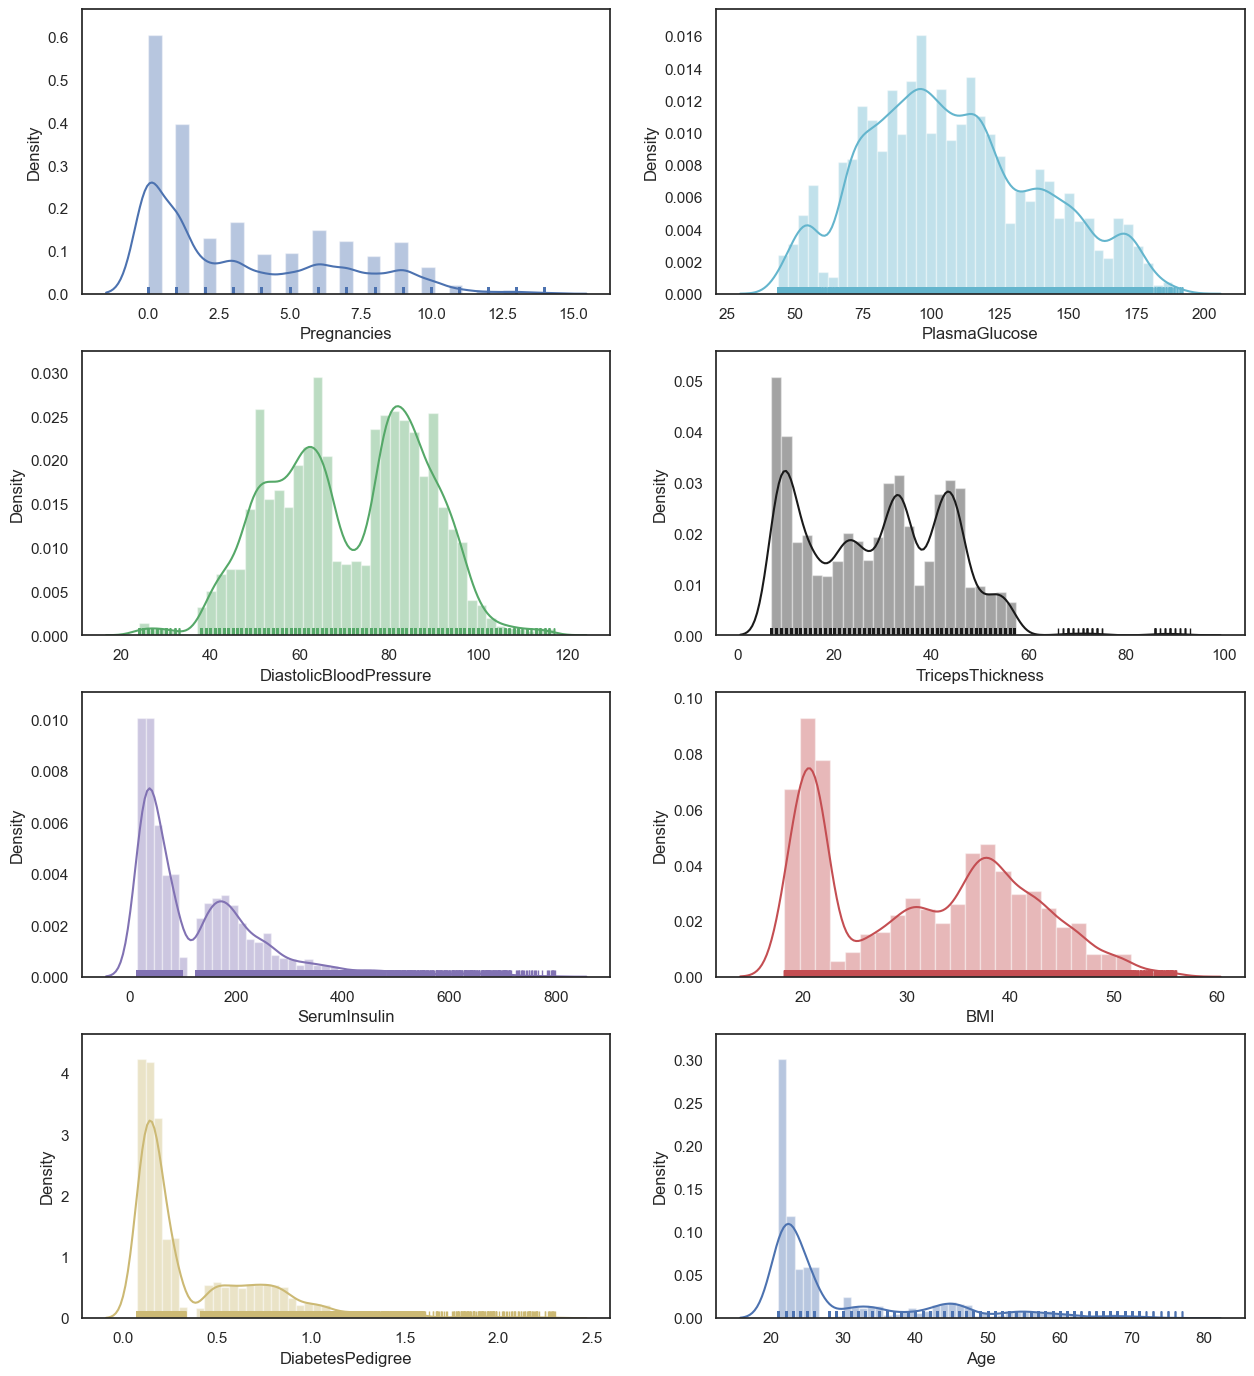

In [16]:
sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')
for i in range(len(columns)):
    
    plt.subplot(4,2,i+1)
    sns.distplot(diabetes[columns[i]], hist=True, rug=True, color=colours[i])

None of the graphs here are following a normal distribution.

#  <p style="color:Blue;">5. Data PreProcessing</p>

**5.1 Feature Engineering**

In [17]:
diabetes_with_preprocessing = diabetes

<Axes: >

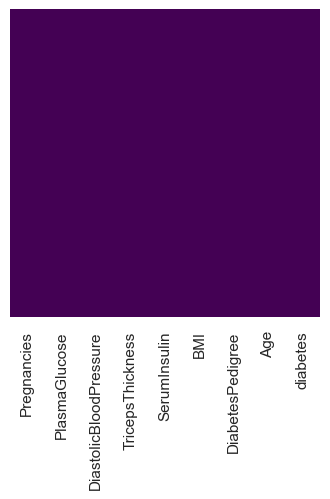

In [18]:
plt.figure(figsize=(4,4))

sns.heatmap(diabetes_with_preprocessing.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [19]:
#identify the numeric columns for skewness and kurtosis
num_cols = diabetes_with_preprocessing.select_dtypes(include=['float64','int64']).columns.tolist()
cols_to_analysed_skew = []
for col in num_cols:
    if((diabetes_with_preprocessing[col].skew() < -2) | (diabetes_with_preprocessing[col].skew() > 2)):
        print("column",col,",skew:",diabetes_with_preprocessing[col].skew())
        cols_to_analysed_skew.append(col)
print(cols_to_analysed_skew) 

cols_to_analysed_kur = []
for col in num_cols:
    if((diabetes_with_preprocessing[col].kurtosis() < -7) | (diabetes_with_preprocessing[col].kurtosis() > 7)):
        print("column",col,",kurtosis:",diabetes_with_preprocessing[col].kurtosis())
        cols_to_analysed_kur.append(col)
print(cols_to_analysed_kur) 

col_to_analysed = list(set(cols_to_analysed_skew + cols_to_analysed_kur))
print(col_to_analysed)

[]
[]
[]


In [20]:
# Scaling those columns which have values greater than 1
scaleIt = MinMaxScaler()
columns_to_be_scaled = [c for c in diabetes.columns if diabetes[c].max() > 1]
print("The columns which are to be scaled are :",columns_to_be_scaled)

scaled_columns = scaleIt.fit_transform(diabetes_with_preprocessing[columns_to_be_scaled])
scaled_columns = pd.DataFrame(scaled_columns, columns=columns_to_be_scaled)
scaled_columns['diabetes'] = diabetes['diabetes'] 
#copying the scaled DataFrame to original DataFrame

diabetes_with_preprocessing=scaled_columns
diabetes_with_preprocessing

The columns which are to be scaled are : ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,diabetes
0,0.000000,0.858108,0.602151,0.313953,0.011465,0.668952,0.510511,0.000000,0
1,0.571429,0.324324,0.741935,0.465116,0.028025,0.080352,0.036123,0.035714,0
2,0.500000,0.479730,0.247312,0.523256,0.026752,0.616137,0.000438,0.035714,0
3,0.642857,0.398649,0.580645,0.209302,0.369427,0.300831,0.541848,0.392857,1
4,0.071429,0.277027,0.376344,0.232558,0.026752,0.645027,0.212047,0.017857,0
...,...,...,...,...,...,...,...,...,...
14995,0.714286,0.141892,0.387097,0.453488,0.207643,0.404713,0.031608,0.357143,1
14996,0.142857,0.195946,0.451613,0.232558,0.196178,0.315380,0.352683,0.303571,1
14997,0.000000,0.331081,0.698925,0.418605,0.054777,0.012956,0.156959,0.053571,0
14998,0.000000,0.594595,0.795699,0.127907,0.187261,0.042056,0.100836,0.035714,0


In [21]:
diabetes_with_preprocessing.shape

(15000, 9)

In [22]:
diabetes_with_preprocessing[diabetes_with_preprocessing.duplicated()].shape

(0, 9)

In [23]:
diabetes_with_preprocessing = diabetes_with_preprocessing[~diabetes_with_preprocessing.duplicated()]

In [24]:
diabetes_with_preprocessing.shape

(15000, 9)

In [25]:
def thresholdsforOutliers(column_name):
    q1=diabetes_with_preprocessing[column_name].quantile(q=0.25)
    q3=diabetes_with_preprocessing[column_name].quantile(q=0.75)
    IQR=q3-q1
    upper=q3+(1.5*IQR)
    lower=q1-(1.5*IQR)
    return ({"upper":upper,"lower":lower})

In [26]:
diabetes_with_preprocessing.shape

(15000, 9)

In [27]:
diabetes_with_preprocessing_rem= diabetes_with_preprocessing

In [28]:
for col in diabetes_with_preprocessing_rem.select_dtypes(include=np.number):
    print(col)
    count1 = diabetes_with_preprocessing_rem[diabetes_with_preprocessing_rem[col] == 0][col].count()
    print(count1)
    # if theer is no col with zero value 
    if(count1 != 0):
        thresholds=thresholdsforOutliers(col)
        col_upper=thresholds["upper"]
        col_lower=thresholds["lower"]

        percentage_removed=len(diabetes_with_preprocessing_rem[diabetes_with_preprocessing_rem[col]>col_upper])/len(diabetes_with_preprocessing_rem)*100
        print(round(percentage_removed,2), "% data has ",col," greater than the upper threshold", col_upper)
        percentage_removed_lower=len(diabetes_with_preprocessing_rem[diabetes_with_preprocessing_rem[col]<col_lower])/len(diabetes_with_preprocessing_rem)*100
        print(round(percentage_removed_lower,2), "% data has ",col," lesser than the lower threshold", col_lower)
        diabetes_with_preprocessing_rem=diabetes_with_preprocessing_rem[( diabetes_with_preprocessing[col] > col_lower) & (diabetes_with_preprocessing[col] < col_upper)]
        print("Shape after removing",diabetes_with_preprocessing_rem.shape)

Pregnancies
4377
0.0 % data has  Pregnancies  greater than the upper threshold 1.0714285714285714
0.0 % data has  Pregnancies  lesser than the lower threshold -0.6428571428571428
Shape after removing (15000, 9)
PlasmaGlucose
23
0.0 % data has  PlasmaGlucose  greater than the upper threshold 1.0304054054054055
0.0 % data has  PlasmaGlucose  lesser than the lower threshold -0.1858108108108109
Shape after removing (15000, 9)
DiastolicBloodPressure
19
0.0 % data has  DiastolicBloodPressure  greater than the upper threshold 1.0913978494623657
0.0 % data has  DiastolicBloodPressure  lesser than the lower threshold -0.06989247311827967
Shape after removing (15000, 9)
TricepsThickness
511
0.21 % data has  TricepsThickness  greater than the upper threshold 0.8488372093023256
0.0 % data has  TricepsThickness  lesser than the lower threshold -0.3604651162790698
Shape after removing (14969, 9)
SerumInsulin
158
4.43 % data has  SerumInsulin  greater than the upper threshold 0.5286624203821657
0.0 %

In [29]:
diabetes_with_preprocessing = diabetes_with_preprocessing_rem

In [30]:
diabetes_with_preprocessing.shape

(12945, 9)

**5.2 Dividing The Data Into X And Y**

In [31]:
x=diabetes.iloc[:,:-1]
y=diabetes.iloc[:,-1:]
x.head(5),y.head(5)

(   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
 0            0            171                      80                34   
 1            8             92                      93                47   
 2            7            115                      47                52   
 3            9            103                      78                25   
 4            1             85                      59                27   
 
    SerumInsulin        BMI  DiabetesPedigree  Age  
 0            23  43.509726          1.213191   21  
 1            36  21.240576          0.158365   23  
 2            35  41.511523          0.079019   23  
 3           304  29.582192          1.282870   43  
 4            35  42.604536          0.549542   22  ,
    diabetes
 0         0
 1         0
 2         0
 3         1
 4         0)

In [32]:
x_with_preprocessing=diabetes_with_preprocessing.iloc[:,:-1]
y_with_preprocessing=diabetes_with_preprocessing.iloc[:,-1:]
x_with_preprocessing.head(5),y_with_preprocessing.head(5)

(   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
 0     0.000000       0.858108                0.602151          0.313953   
 1     0.571429       0.324324                0.741935          0.465116   
 2     0.500000       0.479730                0.247312          0.523256   
 3     0.642857       0.398649                0.580645          0.209302   
 4     0.071429       0.277027                0.376344          0.232558   
 
    SerumInsulin       BMI  DiabetesPedigree       Age  
 0      0.011465  0.668952          0.510511  0.000000  
 1      0.028025  0.080352          0.036123  0.035714  
 2      0.026752  0.616137          0.000438  0.035714  
 3      0.369427  0.300831          0.541848  0.392857  
 4      0.026752  0.645027          0.212047  0.017857  ,
    diabetes
 0         0
 1         0
 2         0
 3         1
 4         0)

**5.3 Train Test Split**

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [34]:
print("Percentage of Positive Values in training data before Smote :",y_train.value_counts(normalize=True)[1]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data before Smote :",y_train.value_counts(normalize=True)[0]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")

print()
print('Shape of x before applying SMOTE :', x_train.shape)


smote = SMOTE()
x_train,y_train = smote.fit_resample(x_train,y_train)

print('Shape of x after applying SMOTE : ', x_train.shape)
print()

print("Percentage of Positive Values in training data after Smote :",y_train.value_counts(normalize=True)[1]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data after Smote :",y_train.value_counts(normalize=True)[0]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")


Percentage of Positive Values in training data before Smote : 33.45 %
Percentage of Negative Values in training data before Smote : 66.55 %

Shape of x before applying SMOTE : (12000, 8)
Shape of x after applying SMOTE :  (15972, 8)

Percentage of Positive Values in training data after Smote : 50.0 %
Percentage of Negative Values in training data after Smote : 50.0 %


In [35]:
x_train_with_pre, x_test_with_pre, y_train_with_pre, y_test_with_pre = train_test_split(x_with_preprocessing,y_with_preprocessing , test_size = 0.2, random_state = 42)

**5.4 Using SMOTE To Handle Class Imbalance**


In [36]:
print("Percentage of Positive Values in training data before Smote :",y_train_with_pre.value_counts(normalize=True)[1]/(y_train.value_counts(normalize=True)[0]+y_train_with_pre.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data before Smote :",y_train_with_pre.value_counts(normalize=True)[0]/(y_train.value_counts(normalize=True)[0]+y_train_with_pre.value_counts(normalize=True)[1])*100,"%")

print()
print('Shape of x before applying SMOTE :', x_train_with_pre.shape)


smote = SMOTE()
x_train_with_pre,y_train_with_pre = smote.fit_resample(x_train_with_pre,y_train_with_pre)

print('Shape of x after applying SMOTE : ', x_train_with_pre.shape)
print()

print("Percentage of Positive Values in training data after Smote :",y_train_with_pre.value_counts(normalize=True)[1]/(y_train_with_pre.value_counts(normalize=True)[0]+y_train_with_pre.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data after Smote :",y_train_with_pre.value_counts(normalize=True)[0]/(y_train_with_pre.value_counts(normalize=True)[0]+y_train_with_pre.value_counts(normalize=True)[1])*100,"%")


Percentage of Positive Values in training data before Smote : 35.88410104011887 %
Percentage of Negative Values in training data before Smote : 92.3476968796434 %

Shape of x before applying SMOTE : (10356, 8)
Shape of x after applying SMOTE :  (14916, 8)

Percentage of Positive Values in training data after Smote : 50.0 %
Percentage of Negative Values in training data after Smote : 50.0 %


In [37]:
accuracy_metrics = []
precision_metrics =[]
recall_metrics = []
roc_auc_metrics= []

#  <p style="color:Blue;">6. Building The Models</p>

**6.1 Logistic Regression**

**6.1.1 Logistic Regression without preprocessing**

In [38]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
print("Precision score for Logistic Regression is :",precision_score(y_test, predicted,)*100, "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
print()
print("Recall score for Logistic Regression is :",recall_score(y_test, predicted,)*100, "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")
#print(accuracy_metrics)

Confusion Matrix : 
 [[1587  427]
 [ 239  747]]

The accuracy of Logistic Regression is :  77.8 %
Precision score for Logistic Regression is : 63.62862010221465 %

Recall score for Logistic Regression is : 75.7606490872211 %


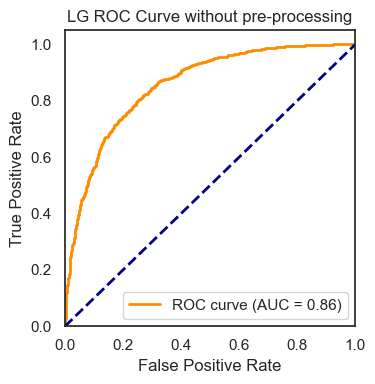

In [39]:
predictions = model.predict(x_test)
predictions_prob = model.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LG ROC Curve without pre-processing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.1.2 Logistic Regression with preprocessing**

In [40]:
model_with_pre = LogisticRegression()
model_with_pre.fit(x_train_with_pre, y_train_with_pre)
predicted=model_with_pre.predict(x_test_with_pre)
conf_with_pre = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf_with_pre)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print("Precision score for Logistic Regression is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print("Recall score for Logistic Regression is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[1413  424]
 [ 181  571]]
The accuracy of Logistic Regression is :  76.63190421011974 %
Precision score for Logistic Regression is : 57.38693467336683 %
Recall score for Logistic Regression is : 75.93085106382979 %


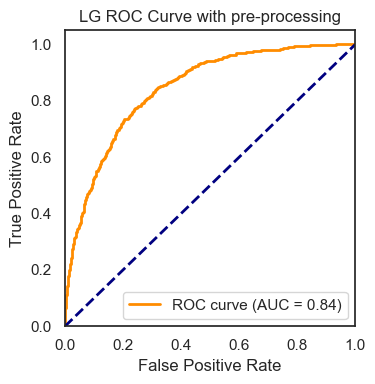

In [41]:
predictions_prob = model_with_pre.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LG ROC Curve with pre-processing')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.2 Gaussian Naive Bayes**


**6.2.1 Gaussian Naive Bayes without preprocessing**


In [42]:
model = GaussianNB()
model.fit(x_train, y_train)  
predicted = model.predict(x_test)  
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print ("The accuracy of Gaussian Naive Bayes is : ", accuracy_score(y_test, predicted)*100, "%")
print("Precision score for Gaussian Naive Bayes is :",precision_score(y_test, predicted,)*100, "%")
print("Recall score for Gaussian Naive Bayes is :",recall_score(y_test, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")


Confusion Matrix : 
 [[1674  340]
 [ 268  718]]
The accuracy of Gaussian Naive Bayes is :  79.73333333333333 %
Precision score for Gaussian Naive Bayes is : 67.86389413988658 %
Recall score for Gaussian Naive Bayes is : 72.81947261663286 %


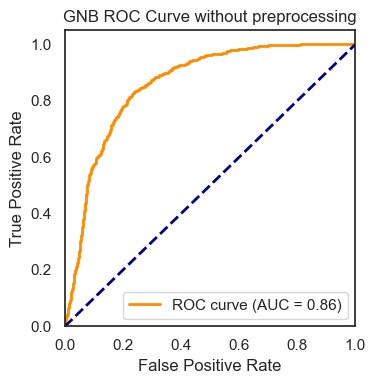

In [43]:
predictions_prob = model.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, predicted)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GNB ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.2.2 Gaussian Naive Bayes with preprocessing**


In [44]:
model_with_pre = GaussianNB()
model_with_pre.fit(x_train_with_pre, y_train_with_pre)
  
predicted = model_with_pre.predict(x_test_with_pre)
  
conf_with_pre = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf_with_pre)
print ("The accuracy of Gaussian Naive Bayes is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print("Precision score for Gaussian Naive Bayes is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print("Recall score for Gaussian Naive Bayes is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[1488  349]
 [ 201  551]]
The accuracy of Gaussian Naive Bayes is :  78.7562765546543 %
Precision score for Gaussian Naive Bayes is : 61.22222222222222 %
Recall score for Gaussian Naive Bayes is : 73.27127659574468 %


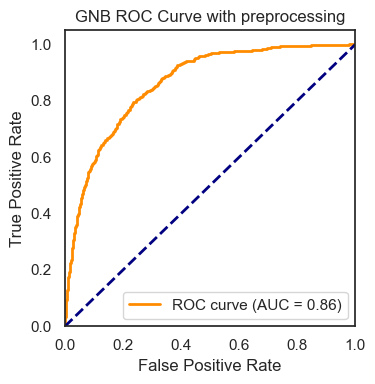

In [45]:
predictions_prob = model_with_pre.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GNB ROC Curve with preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.3 Bernoulli Naive Bayes**


**6.3.1 Bernoulli Naive Bayes without preprocessing**


In [46]:
model = BernoulliNB()
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Bernoulli Naive Bayes is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for Bernoulli Naive Bayes is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for Bernoulli Naive Bayes is :",recall_score(y_test, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[ 895 1119]
 [   7  979]]

The accuracy of Bernoulli Naive Bayes is :  62.46666666666667 %

Precision score for Bernoulli Naive Bayes is : 46.663489037178266 %

Recall score for Bernoulli Naive Bayes is : 99.29006085192698 %


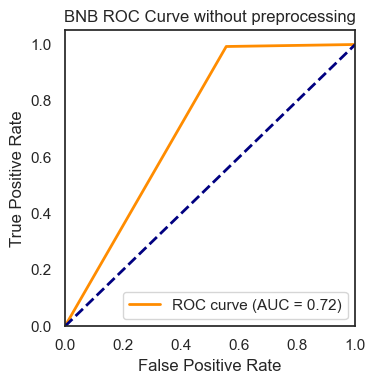

In [47]:
predictions_prob = model.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, predicted)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BNB ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.3.2 Bernoulli Naive Bayes with preprocessing**


In [48]:
model = BernoulliNB()
model.fit(x_train_with_pre, y_train_with_pre)
  
predicted = model.predict(x_test_with_pre)
conf = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Bernoulli Naive Bayes is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print()
print("Precision score for Bernoulli Naive Bayes is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print()
print("Recall score for Bernoulli Naive Bayes is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[855 982]
 [ 19 733]]

The accuracy of Bernoulli Naive Bayes is :  61.33642332947083 %

Precision score for Bernoulli Naive Bayes is : 42.74052478134111 %

Recall score for Bernoulli Naive Bayes is : 97.47340425531915 %


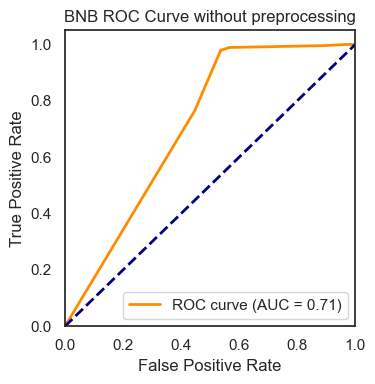

In [49]:
predictions_prob = model.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BNB ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.4 Support Vector Machine**


**6.4.1 Support Vector Machine without preprocessing**


In [50]:
model = SVC()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print ("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")
print("Precision score for SVM is :",precision_score(y_test, predicted,)*100, "%")
print("Recall score for SVM is :",recall_score(y_test, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[1608  406]
 [ 209  777]]
The accuracy of SVM is :  79.5 %
Precision score for SVM is : 65.68047337278107 %
Recall score for SVM is : 78.80324543610547 %


In [51]:
print("area under curve (auc): ", metrics.roc_auc_score(y_test, predicted))
roc_auc_metrics.append( metrics.roc_auc_score(y_test, predicted))


area under curve (auc):  0.79322178825302


**6.4.2 Support Vector Machine with preprocessing**


In [52]:
model = SVC()
model.fit(x_train_with_pre, y_train_with_pre)
predicted = model.predict(x_test_with_pre)

conf = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of SVM is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print()
print("Precision score for SVM is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print()
print("Recall score for SVM is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[1575  262]
 [  79  673]]

The accuracy of SVM is :  86.82889146388567 %

Precision score for SVM is : 71.97860962566844 %

Recall score for SVM is : 89.49468085106383 %


In [53]:
print("area under curve (auc): ", metrics.roc_auc_score(y_test_with_pre, predicted))
roc_auc_metrics.append( metrics.roc_auc_score(y_test_with_pre, predicted))

area under curve (auc):  0.8761614826439964


**6.5 K Nearest Neighbours**

**6.5.1 K Nearest Neighbours without preprocessing**

In [54]:
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of KNN is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for KNN is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for KNN is :",recall_score(y_test, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[1713  301]
 [ 270  716]]

The accuracy of KNN is :  80.96666666666667 %

Precision score for KNN is : 70.4031465093412 %

Recall score for KNN is : 72.61663286004057 %


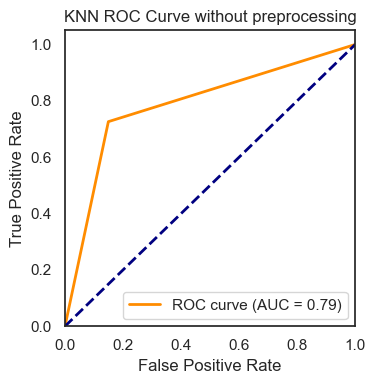

In [55]:
predictions_prob = model.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, predicted)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.5.2 K Nearest Neighbours with preprocessing**

In [56]:
model_with_pre = KNeighborsClassifier(n_neighbors = 1)  
model_with_pre.fit(x_train_with_pre, y_train_with_pre)
predicted = model_with_pre.predict(x_test_with_pre)
conf = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of KNN is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print()
print("Precision score for KNN is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print()
print("Recall score for KNN is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[1613  224]
 [ 181  571]]

The accuracy of KNN is :  84.35689455388182 %

Precision score for KNN is : 71.82389937106917 %

Recall score for KNN is : 75.93085106382979 %


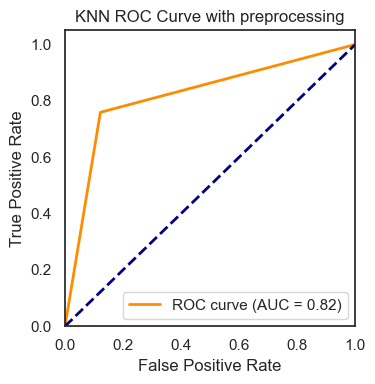

In [57]:
predictions_prob = model_with_pre.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve with preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.6 X Gradient Boosting**

**6.6.1 X Gradient Boosting without preprocessing**

In [58]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
predicted = model.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of XGBoost is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for XGBoost is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for XGBoost is :",recall_score(y_test, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[1926   88]
 [  60  926]]

The accuracy of XGBoost is :  95.06666666666666 %

Precision score for XGBoost is : 91.3214990138067 %

Recall score for XGBoost is : 93.91480730223124 %


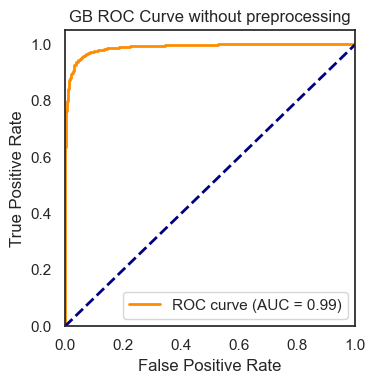

In [59]:
predictions_prob = model.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, predicted)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GB ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.6.1 X Gradient Boosting with preprocessing**

In [60]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train_with_pre, y_train_with_pre)
predicted = model.predict(x_test_with_pre)

conf = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of XGBoost is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print()
print("Precision score for XGBoost is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print()
print("Recall score for XGBoost is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[1767   70]
 [  60  692]]

The accuracy of XGBoost is :  94.97875627655465 %

Precision score for XGBoost is : 90.81364829396325 %

Recall score for XGBoost is : 92.02127659574468 %


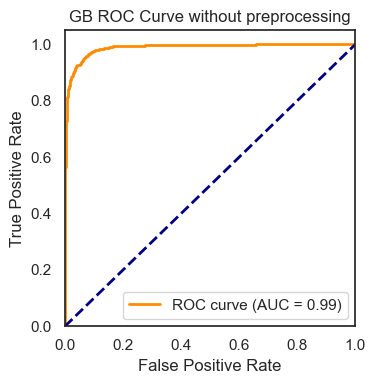

In [61]:
predictions_prob = model.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GB ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [62]:
print("area under curve (auc): ", metrics.roc_auc_score(y_test_with_pre, predicted))

area under curve (auc):  0.9410535794947821


In [63]:
#Fitting The Random Forest Classifier model to the Traning Set
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
RF.fit(x_train, y_train)
RF_y_pred = RF.predict(x_test)
conf = confusion_matrix(y_test, RF_y_pred)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of RF is : ", accuracy_score(y_test, RF_y_pred)*100, "%")
print()
print("Precision score for RF is :",precision_score(y_test, RF_y_pred,)*100, "%")
print()
print("Recall score for RF is :",recall_score(y_test, RF_y_pred,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, RF_y_pred)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, RF_y_pred,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, RF_y_pred,)*100,2)) + "%")

Confusion Matrix : 
 [[1905  109]
 [ 126  860]]

The accuracy of RF is :  92.16666666666666 %

Precision score for RF is : 88.75128998968009 %

Recall score for RF is : 87.2210953346856 %


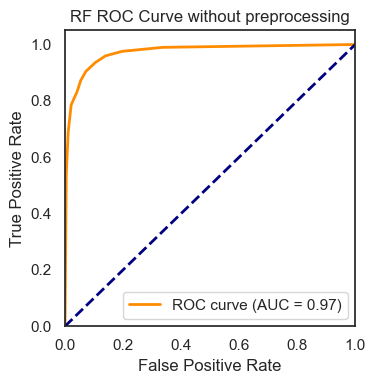

In [64]:
predictions_prob = RF.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, RF_y_pred)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [65]:
RF_with_pre = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
RF_with_pre.fit(x_train_with_pre, y_train_with_pre)
RF_y_pred = RF_with_pre.predict(x_test_with_pre)
conf = confusion_matrix(y_test_with_pre, RF_y_pred)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of RF is : ", accuracy_score(y_test_with_pre, RF_y_pred)*100, "%")
print()
print("Precision score for RF is :",precision_score(y_test_with_pre, RF_y_pred,)*100, "%")
print()
print("Recall score for RF is :",recall_score(y_test_with_pre, RF_y_pred,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[1733  104]
 [  96  656]]

The accuracy of RF is :  92.27500965623793 %

Precision score for RF is : 86.31578947368422 %

Recall score for RF is : 87.2340425531915 %


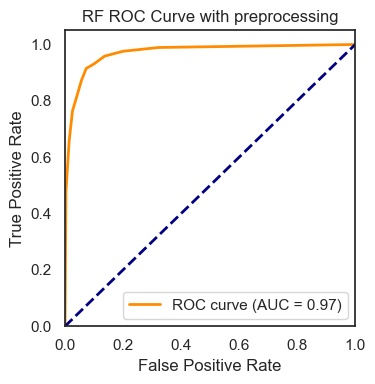

In [66]:
predictions_prob = RF_with_pre.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve with preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [67]:
#Fitting The Decision Tree Classifier model to the Traning Set
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT_y_pred = DT.predict(x_test)
conf = confusion_matrix(y_test, DT_y_pred)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of DT is : ", accuracy_score(y_test, DT_y_pred)*100, "%")
print()
print("Precision score for DT is :",precision_score(y_test, DT_y_pred,)*100, "%")
print()
print("Recall score for DT is :",recall_score(y_test, DT_y_pred,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, DT_y_pred)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, DT_y_pred)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, DT_y_pred)*100,2)) + "%")

Confusion Matrix : 
 [[1841  173]
 [ 158  828]]

The accuracy of DT is :  88.96666666666667 %

Precision score for DT is : 82.71728271728271 %

Recall score for DT is : 83.97565922920892 %


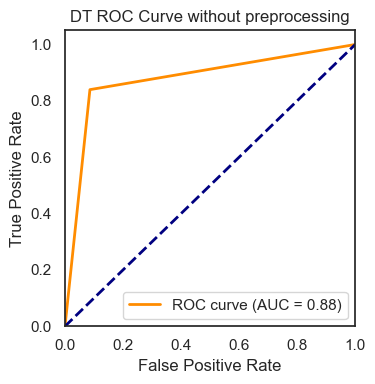

In [68]:
predictions_prob = DT.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, DT_y_pred)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [69]:
#Fitting The Decision Tree Classifier model to the Traning Set
from sklearn.tree import DecisionTreeClassifier
DT_with_pre = DecisionTreeClassifier()
DT_with_pre.fit(x_train_with_pre,y_train_with_pre)
DT_y_pred = DT_with_pre.predict(x_test_with_pre)
conf = confusion_matrix(y_test_with_pre, DT_y_pred)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of DT is : ", accuracy_score(y_test_with_pre, DT_y_pred)*100, "%")
print()
print("Precision score for DT is :",precision_score(y_test_with_pre, DT_y_pred,)*100, "%")
print()
print("Recall score for DT is :",recall_score(y_test_with_pre, DT_y_pred,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, DT_y_pred)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, DT_y_pred)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, DT_y_pred,)*100,2)) + "%")

Confusion Matrix : 
 [[1688  149]
 [ 119  633]]

The accuracy of DT is :  89.64851293935882 %

Precision score for DT is : 80.9462915601023 %

Recall score for DT is : 84.17553191489363 %


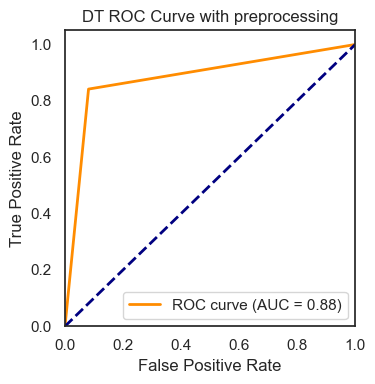

In [70]:
predictions_prob = DT_with_pre.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, DT_y_pred)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC Curve with preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [71]:
sum_table = {'ML Algorithm': ['LR without PreProcessing','LR with PreProcessing','GNB without PreProcessing','GNB with PreProcessing',
                       'BNB without PreProcessing','BNB with PreProcessing','SVM without preprecessing','SVM with preprocessing',
                            'KNN without preproccessing','KNN with preprocessing','GB without preprocessing','GB with preprocessing',
                            'RF without preprocessing','RF with preprocessing','DT without preprocessing','DT with preprocessing'], 
        'Accuracy': accuracy_metrics
        }
accuracy_sum_metric = pd.DataFrame(sum_table ,columns = ['ML Algorithm', 'Accuracy'] )
pre_sum_metric = pd.Series(precision_metrics, name = 'Precision') 
recall_sum_metric = pd.Series(recall_metrics, name = 'Recall')
roc_sum_metric = pd.Series(roc_auc_metrics, name = 'ROC AUC Score')

final_metric = pd.concat([accuracy_sum_metric,pre_sum_metric, recall_sum_metric, roc_sum_metric], axis = 1)

final_metric

,ML Algorithm,Accuracy,Precision,Recall,ROC AUC Score
0,LR without PreProcessing,77.8%,63.63%,75.76%,0.857427
1,LR with PreProcessing,76.63%,57.39%,75.93%,0.844266
2,GNB without PreProcessing,79.73%,67.86%,72.82%,0.861660
3,GNB with PreProcessing,78.76%,61.22%,73.27%,0.863243
4,BNB without PreProcessing,62.47%,46.66%,99.29%,0.718645
5,BNB with PreProcessing,61.34%,42.74%,97.47%,0.709507
6,SVM without preprecessing,79.5%,65.68%,78.8%,0.793222
7,SVM with preprocessing,86.83%,71.98%,89.49%,0.876161
8,KNN without preproccessing,80.97%,70.4%,72.62%,0.788356
9,KNN with preprocessing,84.36%,71.82%,75.93%,0.818685


#  <p style="color:Blue;">7. Conclusion</p>
1. Comparisions made for 6 algorithms with preprocessing vs without preprocessing and found metrics were improving for with processing 
2. Gaussian Naive bayes is performing the best in context of precision and recall where it is identifying 115 cases correct among total 154 predictions